In [3]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers, Model
import efficientnet.tfkeras as efn
import tensorflow as tf
from tensorflow.keras.callbacks import CSVLogger

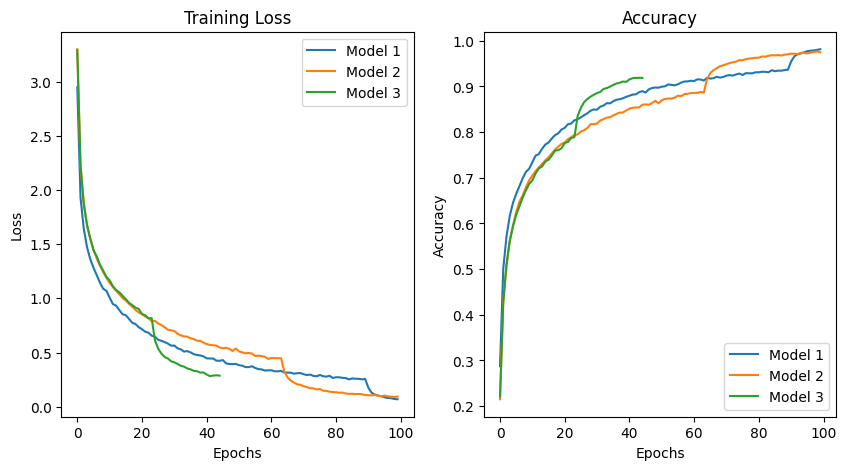

In [28]:
import os
import matplotlib.pyplot as plt
import pandas as pd

# Define the directories containing the log files
directories = {
    "Model 1": "Model 1/plots",
    "Model 2": "Model 2/plots",
    "Model 3": "Model 3/plots"
}

# Read log files and plot the metrics
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

for label, directory in directories.items():
    log_path = os.path.join(directory, "training_log.csv")
    df = pd.read_csv(log_path)

    ax1.plot(df['loss'], label=label)
    ax2.plot(df['accuracy'], label=label)

# Set plot titles and labels
ax1.set_title("Training Loss")
ax1.set_xlabel("Epochs")
ax1.set_ylabel("Loss")
ax1.legend()

ax2.set_title("Accuracy")
ax2.set_xlabel("Epochs")
ax2.set_ylabel("Accuracy")
ax2.legend()

# Save the plot
plt.savefig("comparison_plot_no_validation.png")
plt.show()

In [4]:
size = 100
# Load and preprocess the data
(x_train, y_train), (x_test, y_test) = cifar100.load_data(
    label_mode="fine")

x_train = tf.image.resize(x_train, (size, size))
x_test = tf.image.resize(x_test, (size, size))

#x_train = x_train.astype('float32') / 255.0
#x_test = x_test.astype('float32') / 255.0

y_train = to_categorical(y_train, 100)
y_test = to_categorical(y_test, 100)

# Create data augmentation generator
data_gen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.25,
    height_shift_range=0.25,
    horizontal_flip=True,
    zoom_range=0.2
)
data_gen.fit(x_train)

2023-03-30 10:56:49.845206: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:02:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-03-30 10:56:49.868246: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:02:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-03-30 10:56:49.868467: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:02:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-03-30 10:56:49.870334: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:02:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-03-30 10:56:49.870494: I tensorflow/compile

In [5]:
x_train.shape
data_np = x_train.numpy()

In [1]:
mean = np.mean(data_np)
median = np.median(data_np)
std_dev = np.std(data_np)
variance = np.var(data_np)

print("Mean:", mean)
print("Median:", median)
print("Standard Deviation:", std_dev)
print("Variance:", variance)

NameError: name 'np' is not defined

In [ ]:
min_val = np.min(data_np)
max_val = np.max(data_np)

print("Minimum value:", min_val)
print("Maximum value:", max_val)

In [3]:
!pip install tf_keras_vis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.1/52.1 kB 3.3 MB/s eta 0:00:00


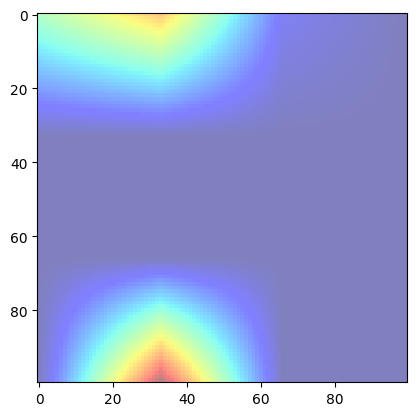

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from tf_keras_vis.gradcam import Gradcam
from tensorflow.keras.models import load_model
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import custom_object_scope
from tensorflow.keras.preprocessing.image import load_img, img_to_array

class FixedDropout(tf.keras.layers.Layer):
    def __init__(self, rate, noise_shape=None, seed=None, **kwargs):
        super(FixedDropout, self).__init__(**kwargs)
        self.rate = rate
        self.noise_shape = noise_shape
        self.seed = seed

    def call(self, inputs, training=None):
        if training:
            return tf.nn.dropout(inputs, rate=self.rate, noise_shape=self.noise_shape, seed=self.seed)
        return inputs
def target_class_output(output):
    return output[:, 0]


image_path = "Images/Wireless-Keyboard-Universal-Portable-2-4G-Wireless-Office-Keyboards-Ultra-Thin-for-Tablet-PC-Computer-clavier.jpg"
input_shape = (100, 100)  # Replace with the input shape of your model
image = load_img(image_path, target_size=input_shape)
image_array = img_to_array(image)
input_image = np.expand_dims(image_array, axis=0)   


model_path = 'Model 2/Model 2.h5'

with custom_object_scope({'FixedDropout': FixedDropout}):
    model = load_model(model_path)


# Assuming you have a trained model `model` and an input image `input_image`
gradcam = Gradcam(model)

# Choose the layer you want to use for Grad-CAM (e.g., last convolutional layer)
target_layer = model.get_layer("top_activation")

# Generate the heatmap
heatmap = gradcam(target_class_output, input_image)


# Visualize the heatmap
plt.imshow(heatmap[0], cmap="jet", alpha=0.5)


In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tf_keras_vis.gradcam import Gradcam
from tf_keras_vis.utils import normalize
from tensorflow.keras.datasets import cifar100

import numpy as np
from tensorflow.keras.datasets import cifar100
import requests
import pickle
from io import BytesIO

import tarfile
import pickle

filename = "cifar-100-python.tar.gz"

# Extract the meta file from the downloaded archive
with tarfile.open(filename, mode='r:gz') as tar:
    meta_file = tar.extractfile('cifar-100-python/meta')

# Load meta data file
meta_data = pickle.load(meta_file, encoding='bytes')

# Get class labels
class_labels = [label.decode('utf-8') for label in meta_data[b'fine_label_names']]

# Load CIFAR-100 dataset
(_, _), (_, _) = cifar100.load_data(label_mode='fine')

class FixedDropout(tf.keras.layers.Layer):
    def __init__(self, rate, noise_shape=None, seed=None, **kwargs):
        super(FixedDropout, self).__init__(**kwargs)
        self.rate = rate
        self.noise_shape = noise_shape
        self.seed = seed

    def call(self, inputs, training=None):
        if training:
            return tf.nn.dropout(inputs, rate=self.rate, noise_shape=self.noise_shape, seed=self.seed)
        return inputs
def target_class_output(output):
    return output[:, 0]

# Load your pre-trained model
model_path = 'Model 3/Model 3.h5'
with custom_object_scope({'FixedDropout': FixedDropout}):
    model = load_model(model_path)
    
    
# Replace the directory variable with the path to your image directory
directory = 'Images'

# Set the target layer for Grad-CAM
target_layer = model.get_layer("top_activation")

# Define the loss function to get the score of the class you're interested in
class_index = 0  # Replace with the index of the class you want to analyze
def loss(output):
    return output[:, class_index]

# Define the model_modifier to set the last layer activation to linear
def model_modifier(current_model):
    current_model.layers[-1].activation = tf.keras.activations.linear

# Create a Grad-CAM instance
gradcam = Gradcam(model, model_modifier=model_modifier, clone=False)


# Iterate through the images in the directory
for filename in os.listdir(directory):
    if filename.endswith(".jpg") or filename.endswith(".png"):
        image_path = os.path.join(directory, filename)
        input_shape = (100, 100)  # Replace with the input shape of your model
        image = load_img(image_path, target_size=input_shape)
        image_array = img_to_array(image)
        input_image = np.expand_dims(image_array, axis=0)

        # Make predictions
        predictions = model.predict(input_image)
        predicted_class = np.argmax(predictions)
        
        # Get the actual label
        predicted_label = class_labels[predicted_class]

        # Generate the heatmap
        heatmap = gradcam(loss, input_image)
        heatmap = normalize(heatmap)

        # Display the original image, the heatmap, and the predicted label side by side
        fig, axs = plt.subplots(1, 2, figsize=(10, 5))
        axs[0].imshow(image)
        axs[0].axis('off')
        axs[0].set_title('Original Image')
        axs[1].imshow(heatmap[0], cmap="jet")
        axs[1].axis('off')
        axs[1].set_title(f"Heatmap - Predicted Label: {predicted_label}")
        plt.suptitle(filename)
        plt.show()

ValueError: I/O operation on closed file

1/1 [==============================] - 2s 2s/step


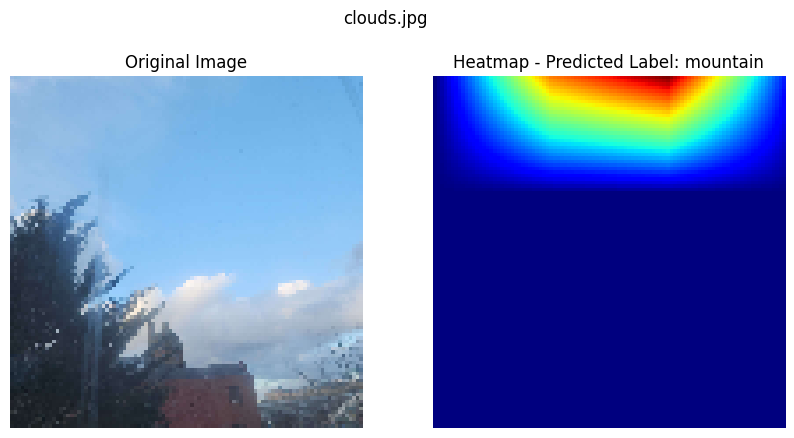

1/1 [==============================] - 0s 24ms/step


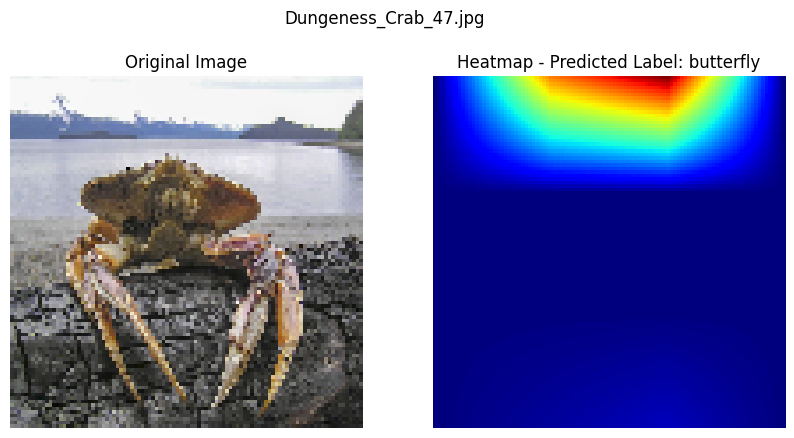

1/1 [==============================] - 0s 33ms/step


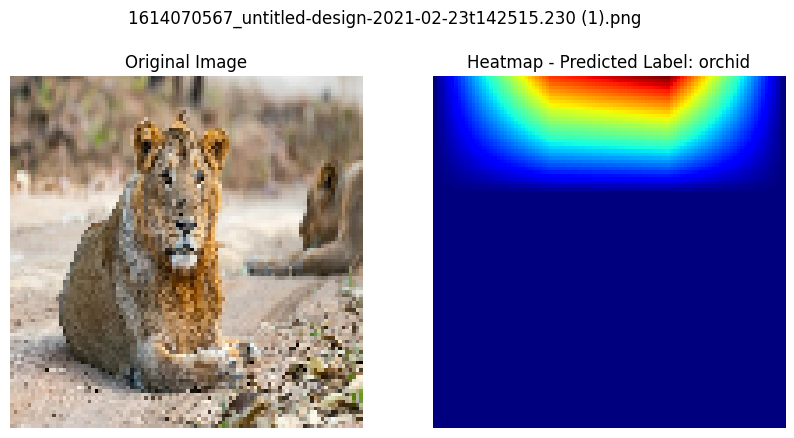

1/1 [==============================] - 0s 47ms/step


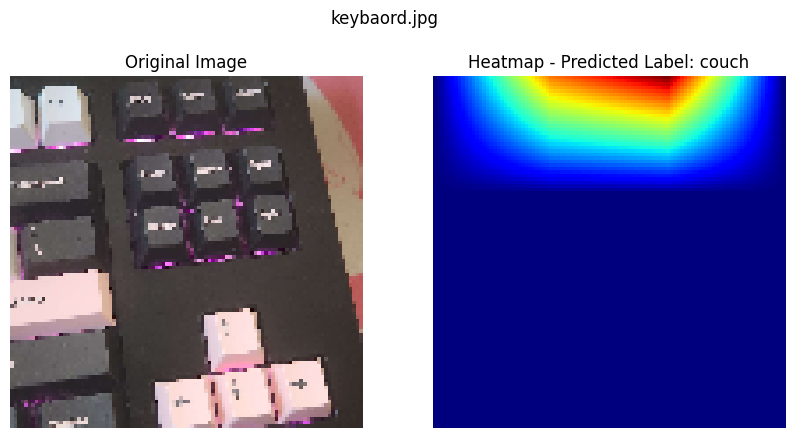

1/1 [==============================] - 0s 25ms/step


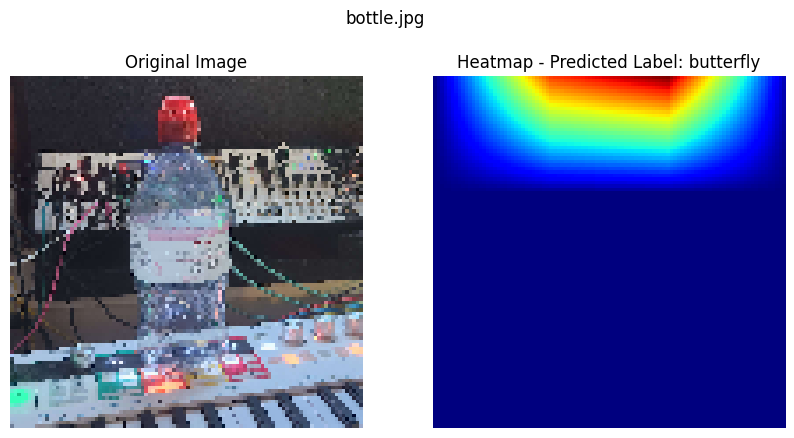

1/1 [==============================] - 0s 25ms/step


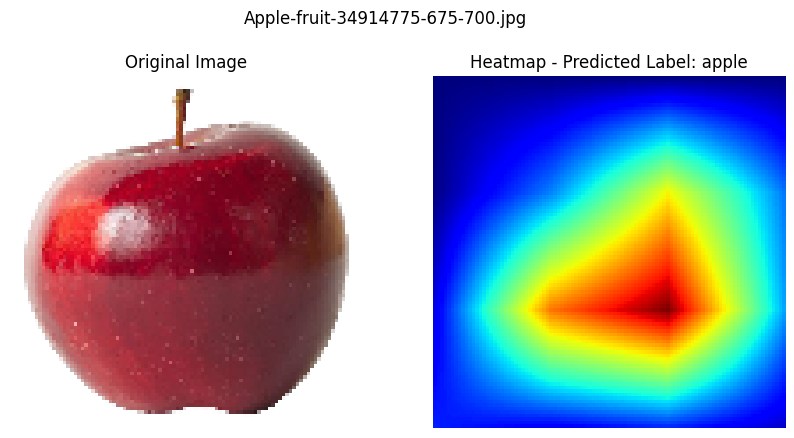

1/1 [==============================] - 0s 30ms/step


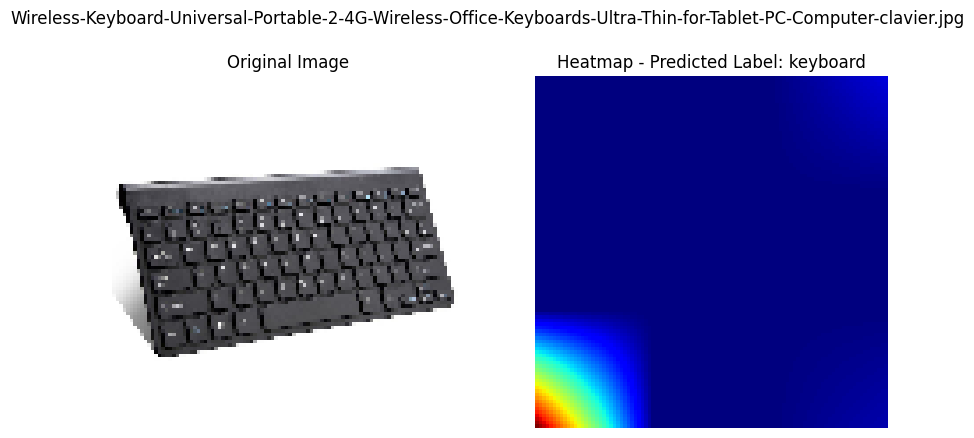

In [68]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tf_keras_vis.gradcam import Gradcam
from tf_keras_vis.utils import normalize
import tarfile
import pickle
import tensorflow as tf

# Load class labels from tar.gz file
filename = "cifar-100-python.tar.gz"

# Extract the meta file from the downloaded archive
with tarfile.open(filename, mode='r:gz') as tar:
    tar.extract('cifar-100-python/meta', path='cifar100_meta_extracted')

# Load meta data file
with open('cifar100_meta_extracted/cifar-100-python/meta', 'rb') as meta_file:
    meta_data = pickle.load(meta_file, encoding='bytes')

# Get class labels
class_labels = [label.decode('utf-8') for label in meta_data[b'fine_label_names']]

class FixedDropout(tf.keras.layers.Layer):
    def __init__(self, rate, noise_shape=None, seed=None, **kwargs):
        super(FixedDropout, self).__init__(**kwargs)
        self.rate = rate
        self.noise_shape = noise_shape
        self.seed = seed

    def call(self, inputs, training=None):
        if training:
            return tf.nn.dropout(inputs, rate=self.rate, noise_shape=self.noise_shape, seed=self.seed)
        return inputs

# Load your pre-trained model
model_path = 'Model 2/Model 2.h5'
with tf.keras.utils.custom_object_scope({'FixedDropout': FixedDropout}):
    model = load_model(model_path)

# Replace the directory variable with the path to your image directory
directory = 'Images'

# Set the target layer for Grad-CAM
target_layer = model.get_layer("top_activation")

# Define the loss function to get the score of the class you're interested in
class_index = 0  # Replace with the index of the class you want to analyze
def loss(output):
    return output[:, class_index]

# Define the model_modifier to set the last layer activation to linear
def model_modifier(current_model):
    current_model.layers[-1].activation = tf.keras.activations.linear

# Create a Grad-CAM instance
gradcam = Gradcam(model, model_modifier=model_modifier, clone=False)

# Iterate through the images in the directory
for filename in os.listdir(directory):
    if filename.endswith(".jpg") or filename.endswith(".png"):
        image_path = os.path.join(directory, filename)
        input_shape = (100, 100)  # Replace with the input shape of your model
        image = load_img(image_path, target_size=input_shape)
        image_array = img_to_array(image)
       # image_array = image_array / 255.0
        input_image = np.expand_dims(image_array, axis=0)

        # Make predictions
        predictions = model.predict(input_image)
        predicted_class = np.argmax(predictions)

        # Get the actual label
        predicted_label = class_labels[predicted_class]

        # Generate the heatmap
        heatmap = gradcam(loss, input_image)
        heatmap = normalize(heatmap)

         # Display the original image, the heatmap, and the predicted label side by side
        fig, axs = plt.subplots(1, 2, figsize=(10, 5))
        axs[0].imshow(image)
        axs[0].axis('off')
        axs[0].set_title('Original Image')
        axs[1].imshow(heatmap[0], cmap="jet")
        axs[1].axis('off')
        axs[1].set_title(f"Heatmap - Predicted Label: {predicted_label}")
        plt.suptitle(filename)
        plt.show()

In [30]:
# Load the model from the H5 file
models = ['Model 1/Model 1.h5','Model 2/Model 2.h5','Model 3/Model 3.h5']
for i in models:
    with tf.keras.utils.custom_object_scope({'FixedDropout': FixedDropout}):
        model = load_model(i)
        print(model .summary())


        

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 100, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 stem_conv (Conv2D)             (None, 50, 50, 40)   1080        ['input_2[0][0]']                
                                                                                                  
 stem_bn (BatchNormalization)   (None, 50, 50, 40)   160         ['stem_conv[0][0]']              
                                                                                                  
 stem_activation (Activation)   (None, 50, 50, 40)   0           ['stem_bn[0][0]']          

In [54]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import to_categorical
def evaluate_models(model_paths, x_test, y_test):
    test_results = {}
    
    for model_path in model_paths:
        with tf.keras.utils.custom_object_scope({'FixedDropout': FixedDropout}):
            model = load_model(model_path)
            test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
            test_results[model_path] = {'loss': test_loss, 'accuracy': test_accuracy}
            print(f"Model: {model_path}, Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")
    
    return test_results

# Example usage
models = ['Model 3/Model 3.h5']

(x_train, y_train), (x_test, y_test) = cifar100.load_data(
    label_mode="fine")
size = 100
y_test = to_categorical(y_test)
x_test = tf.image.resize(x_test, (size, size))
x_test = x_test /255
test_results = evaluate_models(models, x_test, y_test)


Model: Model 3/Model 3.h5, Test Loss: 0.8584721684455872, Test Accuracy: 0.8091999888420105


In [55]:
size = 100
y_test = to_categorical(y_test)
x_test = tf.image.resize(x_test, (size, size))
x_test = x_test /255
test_results = evaluate_models('Model 3/Model 3.h5', x_test, y_test)

OSError: No file or directory found at M

313/313 [==============================] - 11s 28ms/step
Overall metrics for Model 1/Model 1.h5:
True Positives: 100
True Negatives: 980100
False Positives: 9900
False Negatives: 9900


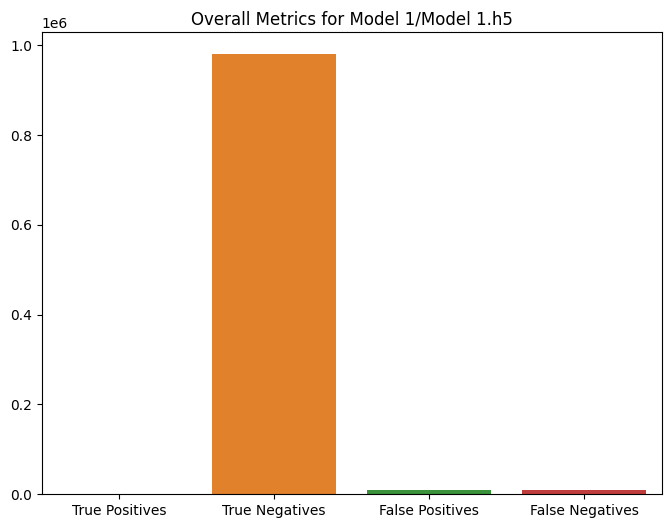

313/313 [==============================] - 13s 35ms/step
Overall metrics for Model 2/Model 2.h5:
True Positives: 100
True Negatives: 980100
False Positives: 9900
False Negatives: 9900


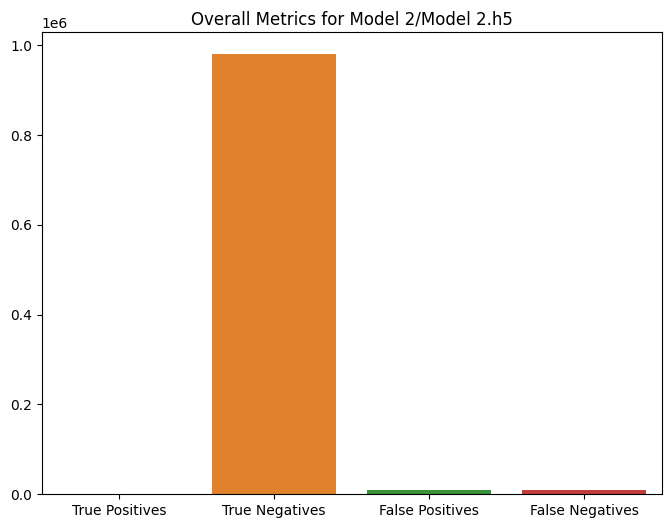

313/313 [==============================] - 14s 37ms/step
Overall metrics for Model 3/Model 3.h5:
True Positives: 8092
True Negatives: 988092
False Positives: 1908
False Negatives: 1908


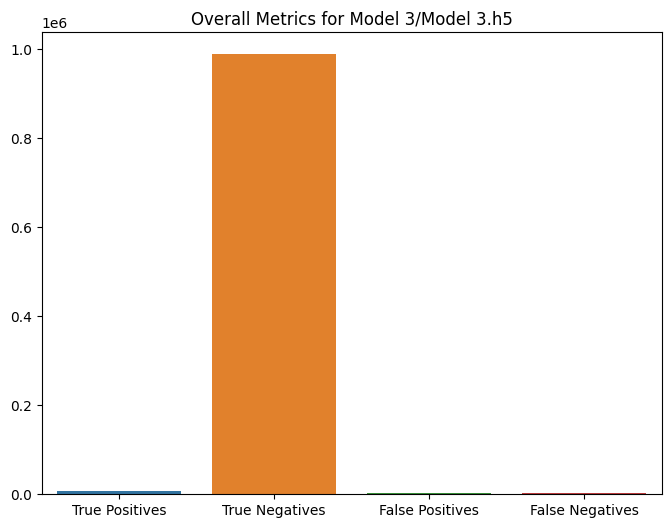

In [66]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix
size = 100

import os
import numpy as np
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix
def load_cifar100_data():
    (X_train, y_train), (X_test, y_test) = cifar100.load_data(label_mode='fine')
    X_train = tf.image.resize(X_test, (size, size))
    X_test = tf.image.resize(X_test, (size, size))
    y_train = to_categorical(y_train)
    y_test = to_categorical(y_test)

    # Normalize pixel values
    X_train = X_train / 255
    X_test = X_test/ 255

    return X_train, X_test, y_train, y_test
def render_bar_plot(metrics, model_name):
    plt.figure(figsize=(8, 6))
    sns.barplot(x=['True Positives', 'True Negatives', 'False Positives', 'False Negatives'], y=metrics)
    plt.title(f'Overall Metrics for {model_name}')
    plt.show()
def evaluate_model(model, X_test, y_test):
    predictions = np.argmax(model.predict(X_test), axis=-1)
    true_labels = np.argmax(y_test, axis=-1)
    cm = confusion_matrix(true_labels, predictions)
    return cm
def render_heatmap(confusion_mat, model_name):
    plt.figure(figsize=(10, 10))
    sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="YlGnBu", linewidths=.5, cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()
    
def calculate_overall_metrics(confusion_mat):
    FP = confusion_mat.sum(axis=0) - np.diag(confusion_mat)
    FN = confusion_mat.sum(axis=1) - np.diag(confusion_mat)
    TP = np.diag(confusion_mat)
    TN = confusion_mat.sum() - (FP + FN + TP)

    overall_FP = np.sum(FP)
    overall_FN = np.sum(FN)
    overall_TP = np.sum(TP)
    overall_TN = np.sum(TN)

    return overall_TP, overall_TN, overall_FP, overall_FN
def main():
    h5_files = [
        'Model 1/Model 1.h5',
        'Model 2/Model 2.h5',
        'Model 3/Model 3.h5'
    ]

    X_train, X_test, y_train, y_test = load_cifar100_data()

    for idx, h5_file in enumerate(h5_files):
        if os.path.exists(h5_file):
            with tf.keras.utils.custom_object_scope({'FixedDropout': FixedDropout}):
                model = load_model(h5_file)
                confusion_mat = evaluate_model(model, X_test, y_test)

                overall_TP, overall_TN, overall_FP, overall_FN = calculate_overall_metrics(confusion_mat)
                print(f"Overall metrics for {h5_file}:")
                print(f"True Positives: {overall_TP}")
                print(f"True Negatives: {overall_TN}")
                print(f"False Positives: {overall_FP}")
                print(f"False Negatives: {overall_FN}")
                render_bar_plot([overall_TP, overall_TN, overall_FP, overall_FN], h5_file)
        else:
            print(f"{h5_file} not found.")

if __name__ == "__main__":
    main()

In [63]:
!pip install seaborn

13677.87s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 5.3 MB/s eta 0:00:0000:0100:01


In [40]:
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import plot_model

# Load the model from the H5 file


with tf.keras.utils.custom_object_scope({'FixedDropout': FixedDropout}):
    model = load_model('Model 1/Model 1.h5')




# Plot the model architecture
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [43]:
def generate_latex_table(model):
    table_header = r'''
\begin{table}[!htb]
    \centering
    \begin{tabular}{|c|c|c|c|}
        \hline
        Layer Name & Layer Type & Output Shape & Params \\
        \hline
'''

    table_footer = r'''
    \end{tabular}
\end{table}
'''

    table_body = ""
    for layer in model.layers:
        layer_name = layer.name
        layer_type = type(layer).__name__
        output_shape = str(layer.output_shape)
        params = layer.count_params()
        table_body += f"        {layer_name} & {layer_type} & {output_shape} & {params} \\\\ \\hline\n"

    latex_table = table_header + table_body + table_footer

    return latex_table
with tf.keras.utils.custom_object_scope({'FixedDropout': FixedDropout}):
    model = load_model('Model 1/Model 1.h5')
# Replace 'model' with the name of your model
latex_table = generate_latex_table(model)
print(latex_table)




\begin{table}[!htb]
    \centering
    \begin{tabular}{|c|c|c|c|}
        \hline
        Layer Name & Layer Type & Output Shape & Params \\
        \hline
        input_2 & InputLayer & [(None, 100, 100, 3)] & 0 \\ \hline
        stem_conv & Conv2D & (None, 50, 50, 40) & 1080 \\ \hline
        stem_bn & BatchNormalization & (None, 50, 50, 40) & 160 \\ \hline
        stem_activation & Activation & (None, 50, 50, 40) & 0 \\ \hline
        block1a_dwconv & DepthwiseConv2D & (None, 50, 50, 40) & 360 \\ \hline
        block1a_bn & BatchNormalization & (None, 50, 50, 40) & 160 \\ \hline
        block1a_activation & Activation & (None, 50, 50, 40) & 0 \\ \hline
        block1a_se_squeeze & GlobalAveragePooling2D & (None, 40) & 0 \\ \hline
        block1a_se_reshape & Reshape & (None, 1, 1, 40) & 0 \\ \hline
        block1a_se_reduce & Conv2D & (None, 1, 1, 10) & 410 \\ \hline
        block1a_se_expand & Conv2D & (None, 1, 1, 40) & 440 \\ \hline
        block1a_se_excite & Multiply & (None, 5

In [39]:
!apt-get update
!apt-get install -y graphviz

9789.58s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


Get:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  InRelease [1581 B]
Get:2 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]      
Get:3 http://archive.ubuntu.com/ubuntu focal InRelease [265 kB]                
Get:4 http://security.ubuntu.com/ubuntu focal-security/multiverse amd64 Packages [28.5 kB]
Get:5 http://security.ubuntu.com/ubuntu focal-security/universe amd64 Packages [1027 kB]
Get:6 http://archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]       
Ign:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  Packages [969 kB]
Get:9 http://archive.ubuntu.com/ubuntu focal-backports InRelease [108 kB]      
Get:10 http://security.ubuntu.com/ubuntu focal-security/main amd64 Packages [2589 kB]
Get:11 http://archive.ubuntu.com/ubuntu focal/restricted amd64 Packages [33.4 kB]
Get:12 http://archive.ubuntu

9827.51s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  fontconfig fontconfig-config fonts-dejavu-core fonts-liberation libann0
  libbsd0 libcairo2 libcdt5 libcgraph6 libdatrie1 libfontconfig1 libfreetype6
  libfribidi0 libgd3 libgraphite2-3 libgts-0.7-5 libgts-bin libgvc6 libgvpr2
  libharfbuzz0b libice6 libjbig0 libjpeg-turbo8 libjpeg8 liblab-gamut1
  libltdl7 libpango-1.0-0 libpangocairo-1.0-0 libpangoft2-1.0-0 libpathplan4
  libpixman-1-0 libpng16-16 libsm6 libthai-data libthai0 libtiff5 libwebp6
  libx11-6 libx11-data libxau6 libxaw7 libxcb-render0 libxcb-shm0 libxcb1
  libxdmcp6 libxext6 libxmu6 libxpm4 libxrender1 libxt6 ucf x11-common
Suggested packages:
  gsfonts graphviz-doc libgd-tools
The following NEW packages will be installed:
  fontconfig fontconfig-config fonts-dejavu-core fonts-liberation graphviz
  libann0 libbsd0 libcairo2 libcdt5 libcgraph6 libdatrie1 libfontconfig1
  lib